In [37]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt

In [38]:
customers = pd.read_csv('datasets/Customers.csv')
transactions = pd.read_csv('datasets/Transactions.csv')

merged_data = pd.merge(transactions, customers, on="CustomerID")

In [2]:
customer_features = merged_data.groupby("CustomerID").agg({
    "TotalValue": "sum",        
    "Quantity": "sum",          
    "Price": "mean",            
    "Region": "first"           
}).reset_index()

In [4]:
num_features = ["TotalValue", "Quantity", "Price"]
cat_features = ["Region"]

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_features),
    ("cat", OneHotEncoder(), cat_features)
])

# Apply preprocessing
X = preprocessor.fit_transform(customer_features)

c:\Users\Rishi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Rishi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Rishi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Rishi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\clus

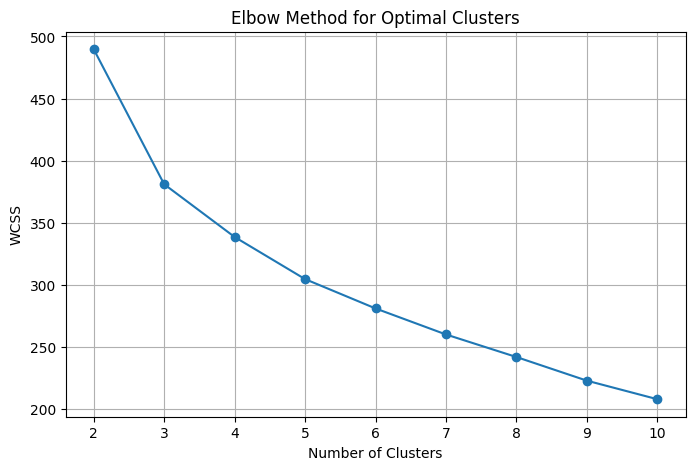

In [35]:
# Using Within Cluster sum of squares to find optimal number of clusters.
wcss = []
for k in range(2, 11):  # Range of clusters from 2 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), wcss, marker="o")
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

Based on the graph, 5 clusters seems to be the most suitable option since the value of WCSS decreases at a slower rate at this point.

In [29]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(X)

customer_features["Cluster"] = cluster_labels


c:\Users\Rishi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [30]:
# Calculating the Davies-Bouldin Index

db_index = davies_bouldin_score(X, cluster_labels)
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 1.3767518525088638


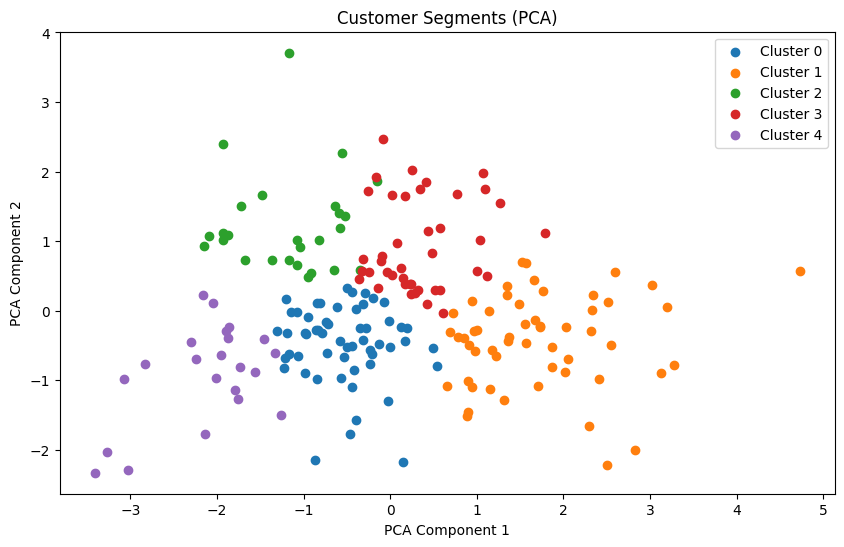

In [31]:
# Visualize Clusters using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
for cluster in range(optimal_k):
    plt.scatter(
        X_pca[cluster_labels == cluster, 0],
        X_pca[cluster_labels == cluster, 1],
        label=f"Cluster {cluster}"
    )
plt.title("Customer Segments (PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()